In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries To Use
from __future__ import division 
from CloudQuant import MiniSimulator 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import os
from sklearn import linear_model
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [462]:
path = 'D:/cStrategy/Factor/'
filenamey='LZ_GPA_VAL_PE.csv'
filenamex='LZ_GPA_VAL_A_FCAP.csv'
filenamez='LZ_GPA_INDU_ZX.csv'
filenamePirce='LZ_GPA_QUOTE_TCLOSE.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenamePB='LZ_GPA_VAL_PB.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
finenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [470]:
timeStampNum = 500
thresholdNum = 0.2
HSIndex='000300.SH'

In [6]:
path+filenamey

'D:/cStrategy/Factor/LZ_GPA_VAL_PE.csv'

In [7]:
for name in os.listdir(path):
    if name.endswith(".csv"):
        print name

LZ_GPA_ACHFCST_ENDDATE.csv
LZ_GPA_CMFTR_CUM_FACTOR.csv
LZ_GPA_DERI_AmountAvg_1M.csv
LZ_GPA_DERI_VWAP.csv
LZ_GPA_EXCH_CAL.csv
LZ_GPA_FIN_IND_QFA_CGRGR.csv
LZ_GPA_FIN_IND_QFA_YOYGR.csv
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv
LZ_GPA_FIN_IND_QFA_YOYOP.csv
LZ_GPA_FIN_IND_QFA_YOYPROFIT.csv
LZ_GPA_FIN_IND_YOYBPS.csv
LZ_GPA_FIN_IND_YOYOCF.csv
LZ_GPA_FIN_IND_YOYROE.csv
LZ_GPA_INDU_SW.csv
LZ_GPA_INDU_ZX.csv
LZ_GPA_INDXQUOTE_CLOSE.csv
LZ_GPA_INDXQUOTE_HIGH.csv
LZ_GPA_INDXQUOTE_OPEN.csv
LZ_GPA_INDXQUOTE_VOLUME.csv
LZ_GPA_QUOTE_TCLOSE.csv
LZ_GPA_QUOTE_TOPEN.csv
LZ_GPA_QUOTE_TVOLUME.csv
LZ_GPA_SLCIND_STOP_FLAG.csv
LZ_GPA_SLCIND_ST_FLAG.csv
LZ_GPA_SLCIND_TRADEDAYCOUNT.csv
LZ_GPA_TMP_INDEX.csv
LZ_GPA_TMP_INDU_SW.csv
LZ_GPA_TMP_INDU_ZX.csv
LZ_GPA_TMP_STK.csv
LZ_GPA_TURNOVER_TurnoverAvg_1M.csv
LZ_GPA_TURNOVER_TurnoverAvg_1M_3M.csv
LZ_GPA_TURNOVER_TurnoverAvg_3M.csv
LZ_GPA_USR_MOM.csv
LZ_GPA_VAL_A_FCAP.csv
LZ_GPA_VAL_A_TCAP.csv
LZ_GPA_VAL_PB.csv
LZ_GPA_VAL_PC.csv
LZ_GPA_VAL_PE.csv
LZ_GPA_VAL_PS.csv
LZ_GPA_VA

In [8]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)
stDF = stDF[-timeStampNum-10:-5]

In [9]:
stDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2017-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)
tradeDayDF = tradeDayDF[-timeStampNum-10:-5]

In [11]:
tradeDayDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_TRADEDAYCOUNTi,,,,,,,,,,,,,,,,,,,,,
2017-02-14,6471,6464,6464,6464,6464,6464,6464,NaN,6445,6432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,6472,6465,6465,6465,6465,6465,6465,NaN,6446,6433,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,6473,6466,6466,6466,6466,6466,6466,NaN,6447,6434,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-17,6474,6467,6467,6467,6467,6467,6467,NaN,6448,6435,...,3.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-20,6475,6468,6468,6468,6468,6468,6468,NaN,6449,6436,...,4.0,4.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN


In [12]:
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)
stopFlagDF = stopFlagDF[-timeStampNum-10:-5]

In [13]:
stopFlagDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_STOP_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2017-02-14,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-17,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-20,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
### get the list of ST, new  and delisted stocks on given date
def GetSTNewSuspend(Date):  ## Date is DateFrame time Index with hour second 
    tempoDF1 = stDF.loc[Date]
    tempoDF2 = tradeDayDF.loc[Date]
    tempoDF3 = stopFlagDF.loc[Date]
    stockList1 = tempoDF1[~tempoDF1.isnull()].index.tolist()
    stockList2 = tempoDF2[tempoDF2 < 60].index.tolist()
    stockList3 = tempoDF3[~tempoDF3.isnull()].index.tolist()
    totalList = set(list(set(stockList1) | set(stockList2) | set(stockList3)))
    return list(totalList)

In [ ]:
#------------------------------ the following part is to winsorize normalize and neutralize----------------------#

In [292]:
##
PEData=pd.read_csv(path+filenamey,infer_datetime_format=True,parse_dates=[0],index_col=0)
PEData=PEData[-timeStampNum-1:-5]
enoughDataStock = PEData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PEData = PEData[enoughDataStockList]
PEData = PEData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PEData = PEData.fillna(method='bfill')

In [322]:
### To filter the ST,new issueing, and suspended stocks before winsorize 
PEDataWinsorized = PEData.copy()
for date in b:
    remainedStocks = list(set(PEData.columns.tolist()) - set(filterdict[date]))
    filteredStocks = list(set(PEData.columns.tolist()) - set(remainedStocks))
    PEDataWinsorized.loc[date][filteredStocks] = np.NaN 
#PEDataWinsorized.loc[b]. isnull().sum(axis=1)

In [316]:
##
PEDataWinsorizedTrans= PEDataWinsorized.loc[b].T
MAD=1.483*np.abs(PEDataWinsorizedTrans-PEDataWinsorizedTrans.median(skipna=True))
PEDataWinsorizedTrans[PEDataWinsorizedTrans>PEDataWinsorizedTrans.median(skipna=True)+3*MAD] = PEDataWinsorizedTrans.median(skipna=True)+3*MAD
PEDataWinsorizedTrans[PEDataWinsorizedTrans<PEDataWinsorizedTrans.median(skipna=True)-3*MAD] = PEDataWinsorizedTrans.median(skipna=True)-3*MAD

In [345]:
#PEFinal.isnull().sum(axis=1)
#PEDataWinsorizedTrans.mean(axis=0,skipna=True)

In [348]:
PENormalized = ((PEDataWinsorizedTrans - PEDataWinsorizedTrans.mean(axis=0,skipna=True))/PEDataWinsorizedTrans.std(axis=0,skipna=True)).T 

In [385]:
FCAPData=pd.read_csv(path+filenamex,infer_datetime_format=True,parse_dates=[0],index_col=0)
FCAPData=FCAPData[-timeStampNum-1:-5]
enoughDataStock1 = FCAPData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList1 = enoughDataStock[enoughDataStock1 ==True].index.tolist()
FCAPData = FCAPData[enoughDataStockList1]
FCAPData = FCAPData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
FCAPData = FCAPData.fillna(method='bfill')
LFCAP =np.log(FCAPData)

In [384]:
#FCAPData.isnull().sum()

In [388]:
def winsorAndnorm(data,filterdict):
    dataWinsorized = data.copy()
    for date in b:
        remainedStocks = list(set(data.columns.tolist()) - set(filterdict[date]))
        filteredStocks = list(set(data.columns.tolist()) - set(remainedStocks))
        dataWinsorized.loc[date][filteredStocks] = np.NaN
    dataWinsorizedTrans= dataWinsorized.loc[b].T
    MAD=1.483*np.abs(dataWinsorizedTrans-dataWinsorizedTrans.median(skipna=True))
    dataWinsorizedTrans[dataWinsorizedTrans>dataWinsorizedTrans.median(skipna=True)+3*MAD] = dataWinsorizedTrans.median(skipna=True)+3*MAD
    dataWinsorizedTrans[dataWinsorizedTrans<dataWinsorizedTrans.median(skipna=True)-3*MAD] = dataWinsorizedTrans.median(skipna=True)-3*MAD
    return ((dataWinsorizedTrans - dataWinsorizedTrans.mean(axis=0,skipna=True))/dataWinsorizedTrans.std(axis=0,skipna=True)).T 

In [547]:
LFCAPData=winsorAndnorm(LFCAP,filterdict)

In [368]:
# read Industry Data
InData=pd.read_csv(path+filenamez,infer_datetime_format=True,parse_dates=[0],index_col=0)

In [401]:
#InData =InData.loc[b]
#dummy_Matrix=pd.get_dummies(InData.iloc[-1]).T.iloc[:-1]

In [505]:
# To creat new dataframe to save the outcome
PEneutralized = pd.DataFrame(index = PENormalized.index, columns = PENormalized.columns,data=None)
for date in b:
    LFCAPIndice = LFCAPData.loc[date].dropna()
    #print LFCAPIndice.isnull().sum()
    PEIndice = PENormalized.loc[date].dropna()
    intersectionStocks = list(set(LFCAPIndice.index) & set(PEIndice.index))
    #print len(LFCAPIndice),len(PEIndice),len(intersectionStocks)
    dummy_Matrix = pd.get_dummies(InData.loc[date]).T.iloc[:-1]
    dummy_Matrix = dummy_Matrix[intersectionStocks].append(LFCAPIndice.loc[intersectionStocks])
    #print dummy_Matrix.shape
    result=sm.OLS(PEIndice.loc[intersectionStocks].T,dummy_Matrix.T).fit()
    PEneutralized.loc[date][intersectionStocks] = result.resid

In [531]:
PEneutralized

,600601.SH,600602.SH,600651.SH,600654.SH,000004.SZ,000002.SZ,000001.SZ,000009.SZ,000012.SZ,600604.SH,...,300483.SZ,300486.SZ,603085.SH,603223.SH,603979.SH,300488.SZ,300489.SZ,603838.SH,300480.SZ,300487.SZ
LZ_GPA_VAL_PE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-27,-0.000478221,-0.272949,0.203919,NaN,0.833974,-0.142375,0.006073,-0.120651,-0.603371,-0.0584063,...,-0.21053,-0.205831,-0.206416,-0.212876,-0.208169,-0.218337,-0.207691,-0.212051,-0.214648,-0.214519
2015-03-31,0.0381281,-0.097798,0.0905058,NaN,0.417709,-0.0881634,5.90413e-05,-0.073539,NaN,0.582041,...,-0.152139,-0.147324,-0.149909,-0.151864,-0.141425,-0.154621,-0.150167,-0.151301,-0.154474,-0.151963
2015-04-30,-0.0923396,NaN,0.0710963,-0.066789,0.28423,-0.182916,0.00185045,-0.054333,-0.258009,0.380148,...,-0.12734,-0.124295,-0.125759,-0.127396,-0.121276,-0.129383,-0.126013,-0.127016,-0.128979,-0.127595
2015-05-29,-0.106537,NaN,0.0904034,NaN,0.312795,-0.161891,-0.000943675,-0.0744756,-0.283775,0.327754,...,-0.177178,-0.168817,-0.175572,-0.17364,-0.149103,-0.175184,-0.174824,-0.172986,-0.179079,-0.172001
2015-06-30,-0.0878337,NaN,0.201879,NaN,0.557967,-0.145386,-0.010786,-0.0609583,-0.117928,0.467161,...,NaN,NaN,NaN,NaN,NaN,-0.267666,-0.271595,-0.263975,-0.281194,-0.25983
2015-07-31,-0.214211,NaN,0.369886,NaN,1.16744,-0.33457,-0.0096722,NaN,-0.265854,1.07016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,-0.127744,-0.146604,0.262675,NaN,1.49634,-0.287209,-0.0111592,-0.130231,-0.624608,0.986002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,-0.193585,-0.118211,0.219959,NaN,1.19781,-0.2979,-0.0103889,-0.139785,-0.584535,NaN,...,-0.0535735,-0.132488,-0.0987362,-0.0262359,-0.26367,-0.272192,-0.149874,-0.506819,-0.000693979,-0.368984
2015-10-30,-0.0892184,-0.0616515,NaN,NaN,0.499602,-0.160534,-0.00650775,-0.0658406,-0.274032,1.00669,...,-0.0313842,-0.0741692,-0.0483718,-0.0283201,-0.097665,-0.120013,-0.0843663,-0.261213,-0.0220898,-0.174558


In [498]:
#PENormalized.isnull().sum(axis=1)

In [ ]:
#------------------------------the following part is to calculate the montly return of the given factor------------------

In [447]:
###
PriceData=pd.read_csv(path+filenamePirce,infer_datetime_format=True,parse_dates=[0],index_col=0)
PriceData=PriceData[-timeStampNum-1:-5]
enoughDataStock = PriceData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PriceData = PriceData[enoughDataStockList]
PriceData = PriceData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PriceData = PriceData.fillna(method='bfill') 
PriceData.dropna(inplace=True)

In [471]:
HS300=pd.read_csv(path+finenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)
HS300=HS300[-timeStampNum-1:-5].loc[b][HSIndex]
#enoughDataStock = HS300.isnull().sum ()< (timeStampNum*thresholdNum)
#enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
#HS300 = HS300[enoughDataStockList]
HS300 = HS300.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
HS300 = HS300.fillna(method='bfill') 
HS300.dropna(inplace=True)

In [481]:
monthlyReturnOfHS300 = np.log((HS300.loc[b].shift(-1)/HS300.loc[b]).iloc[:-1])
monthlyReturnOfStocks = np.log((PriceData.loc[b].shift(-1)/PriceData.loc[b]).iloc[:-1])

activeReturn = monthlyReturnOfStocks.apply(lambda x: x -monthlyReturnOfHS300)

In [539]:
# Creat new dataframe to save the outcome

returnOfPE = pd.DataFrame(index=b[:-1],columns=['PE'],data=None) 
tValueofFactor = pd.DataFrame(index= b[:-1],columns= ['t_value_PE'],data=None)
pValueofFactor = pd.DataFrame(index= b[:-1],columns= ['p_value_PE'],data=None)

In [553]:
ICFactor =  pd.DataFrame(index= b[:-1],columns= ['IC_PE'],data=None)

In [555]:
## OLS to obtain  monthly return of the factor and IC
for date in activeReturn.index:
    PEneutralizedIndice = PEneutralized.loc[date].dropna()
    #print LFCAPIndice.isnull().sum()
    activeReturnIndice = activeReturn.loc[date].dropna()
    intersectionStocks = list(set(PEneutralizedIndice.index) & set(activeReturnIndice.index))
    #print len(LFCAPIndice),len(PEIndice),len(intersectionStocks)
    #print dummy_Matrix.shape
    #print activeReturnIndice.loc[intersectionStocks]
    #print PEneutralizedIndice.loc[intersectionStocks]
    result=sm.OLS(activeReturnIndice.loc[intersectionStocks],PEneutralizedIndice.loc[intersectionStocks].astype(float)).fit()
    #print result.params[0]
    returnOfPE.loc[date] = result.params[0]
    tValueofFactor.loc[date] = result.tvalues[0]
    pValueofFactor.loc[date] = result.pvalues[0]
    ICFactor.loc[date] = activeReturnIndice.loc[intersectionStocks].corr(PEneutralizedIndice.loc[intersectionStocks].astype(float),\
                                                                         method='spearman')

In [565]:
# 
IR = ICFactor.mean()/ICFactor.std()
IR

IC_PE   -0.487281
dtype: float64

In [566]:
ICFactor

,IC_PE
2015-02-27,0.0950054
2015-03-31,0.111076
2015-04-30,0.0282505
2015-05-29,-0.11756
2015-06-30,-0.105802
2015-07-31,-0.045666
2015-08-31,-0.0121936
2015-09-30,0.0344983
2015-10-30,-0.096804
2015-11-30,-0.0966979


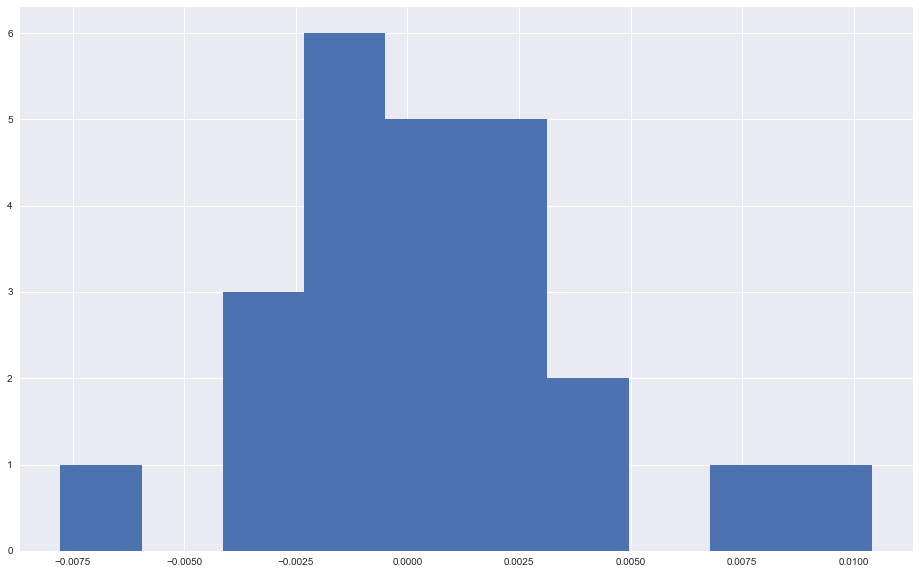

In [552]:
returnOfPE['PE'].hist(figsize=(16,10))

In [545]:
pValueofFactor

,p_value_PE
2015-02-27,0.291134
2015-03-31,0.159333
2015-04-30,0.93091
2015-05-29,0.233891
2015-06-30,0.759939
2015-07-31,0.708076
2015-08-31,0.876995
2015-09-30,0.010595
2015-10-30,0.999736
2015-11-30,0.517638


In [366]:
#result=sm.OLS(PENormalized.iloc[:,0],PENormalized.iloc[:,1:4]).fit()
DummyDF

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,601881.SH,002839.SZ,603429.SH,002845.SZ,300578.SZ,300603.SZ,300605.SZ,603881.SH,300608.SZ,300609.SZ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
### This function to get he end of trading day of each month!
def getLastDayOfMonth(datetimeIndex):     ### This datetimeIndex should be chosen as dataframe.index
    timeTuple =sorted(list(set(zip(datetimeIndex.year,datetimeIndex.month))))
    #print timeTuple
    startOftheMonth=[]
    endOftheMonth=[]
    for time in timeTuple:
        targetList = datetimeIndex[(datetimeIndex.year==time[0])&(datetimeIndex.month==time[1])]
        startOftheMonth.append(targetList[0])
        endOftheMonth.append(targetList[-1])
    return startOftheMonth, endOftheMonth        

In [17]:
##### Function
def disposeData(df,timeStamp,replace=False):
    df = df.tail(timeStamp+5)[-timeStamp-1:-1] ### To delete the last row which is usually all nan value
    enoughDataStock = df.isnull().sum ()< (timeStamp*thresholdNum)
    enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
    df = df[enoughDataStockList]
    df = df.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
    df = df.fillna(method='bfill')   ### Fill N/A value with the next valid obsevation  maybe Mean of the each column should be used? not sure here
    medianSeries =df.median(axis=1,skipna=True)
    MAD=1.483*np.abs(df - medianSeries )
    if replace:                    ###  Replace the extreme value with 3*standar deviation
        df = df.clip(medianSeries - 3*MAD , medianSeries + 3*MAD ,axis=0)
    else:
        df = df[(df>(medianSeries - 3*MAD))&(df<(medianSeries + 3*MAD))]  ### Winsorize. This means we delete the values / maybe we should replace thevalue wtih 
    df = (df-df.mean(axis=1))/df.std(axis=1)    ### Normalize
    df.fillna(0,inplace=True)
    #df.dropna(axis=1,how='any',inplace=True)
    return df

In [19]:
#PEData=disposeData(PEData,timeStampNum,True)
#FCAPData=disposeData(FCAPData,timeStampNum,True)

In [20]:
### This function is to generate industry dummy matrix
def  generateIndDF(path,filename,timeStamp):
    InData=pd.read_csv(path+filenamez,infer_datetime_format=True,parse_dates=[0],index_col=0)
    #InData= InData.tail(timeStamp+5)[-timeStamp-1:-1].dropna(axis=1,how='any')
    InData= InData.tail(timeStamp+5)[-11:-1].dropna(axis=1,how='any')
    InduNum=int(InData.max().max()-InData.min().min())
    x=range(InduNum)
    DummyDF=pd.DataFrame(index=x,columns=InData.columns.tolist(),data=None)
    for stk in DummyDF.columns.tolist():
        Tag = int(InData[stk].iloc[-1])
        if Tag == InduNum+1:
            pass
        else:
            DummyArray = np.zeros(InduNum)
            DummyArray[Tag-1] = 1
            DummyDF[stk] = DummyArray
    return DummyDF

In [21]:
### Wrap into function 
### This function is to calculate the stocks grouped based by factor value,u cam also use 'quantile' method to get the groups 
def getStockGroup(factorData,groupNum=10,Mean_Num=20,ascendingFlag=True):   ## factorData is disposed data which have been winsorized, normalized and neutralized
    groupDic={}
    if Mean_Num ==1:
        sortedStk=factorData.iloc[-1].sort_values(ascending=ascendingFlag)
    else:
        sortedStk=factorData.iloc[-Mean_Num:].mean().sort_values(ascending=ascendingFlag)
    #print factorData.index[-1]
    stkNumPerGFloor = int(np.floor(len(sortedStk)/groupNum))
    stkNumPerGCeil = int(np.ceil(len(sortedStk)/groupNum))
    remainderCount=int(np.mod(len(sortedStk),groupNum))
    for i in xrange(groupNum):
        if i< remainderCount:
            groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:(i+1)*stkNumPerGCeil].index.tolist()
        elif i == remainderCount:
            groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:i*stkNumPerGCeil+stkNumPerGFloor].index.tolist()
        else:
            groupDic['group'+'_'+str(i)] = sortedStk[remainderCount+i*stkNumPerGFloor:remainderCount+(i+1)*stkNumPerGFloor].index.tolist()
    return groupDic

In [364]:
DummyDF=generateIndDF(path,filenamez,timeStampNum).dropna(axis=1)

In [23]:
StockPoolOLS = list(set(FCAPData.columns.tolist()) & set(PEData.columns.tolist())&set(DummyDF.columns.tolist()))
len(StockPoolOLS)
PEData = PEData[StockPoolOLS]
FCAPData = FCAPData[StockPoolOLS]
DummyDF = DummyDF[StockPoolOLS] 

NameError: name 'FCAPData' is not defined

In [ ]:
Group=getStockGroup(PEData,groupNum=10,Mean_Num=20,ascendingFlag=True)

In [ ]:
DummyDF .shape

In [24]:
###### Neutralize 
def neutralizeData(factorDataFrame,DummyDF):  ### DummyDF is the Dummy variable Dataframe
    FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
    #Period = len(FCAPData)
    for time in FinalDF.index: 
        CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
        #print CrossSecData.T.iloc[-1]
        #print DummyDF.shape
        Y=factorDataFrame[factorDataFrame.index==time].T
        #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
        #InsertArray = FCAPData[stk].values
        #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
        #print (InsertArray)
        #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
        #print (InDependence)
        #try:
        result=sm.OLS(Y,CrossSecData).fit()
        #except:
        #pass
        FinalDF.loc[time] = result.resid
    return FinalDF

FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
Period = len(InData)
for time in FinalDF.index: 
    CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
    #print CrossSecData.T.iloc[-1]
    Y=PEData[PEData.index==time].T
    #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
    #InsertArray = FCAPData[stk].values
    #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
    #print (InsertArray)
    #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
    #print (InDependence)
    #try:
    result=sm.OLS(Y,CrossSecData).fit()
    #except:
    #pass
    FinalDF.loc[time] = result.resid

In [ ]:
#neutralizedDF=neutralizeData(PEData,DummyDF)

In [ ]:
neutralizedDF[SSS].iloc[-1].sort_values().index.tolist()

In [ ]:
groupedStk=getStockGroup(neutralizedDF,groupNum=10,Mean_Num=20,ascendingFlag=True)

In [ ]:
for i,j in groupedStk.iteritems():
    print '%s has %d stocks' %(i,len(j))

In [28]:
###
PriceData=pd.read_csv(path+filenamePirce,infer_datetime_format=True,parse_dates=[0],index_col=0)
PriceData=PriceData[-timeStampNum-1:-5]
enoughDataStock = PriceData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PriceData = PriceData[enoughDataStockList]
PriceData = PriceData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PriceData = PriceData.fillna(method='bfill') 
PriceData.dropna(inplace=True)

In [212]:
###
PEData=pd.read_csv(path+filenamey,infer_datetime_format=True,parse_dates=[0],index_col=0)
PEData=PEData[-timeStampNum-1:-5]
enoughDataStock = PEData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PEData = PEData[enoughDataStockList]
#PEData = PEData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
#PEData = PEData.fillna(method='bfill')
#EData  = PEData.clip(PEData.mean()-2*PEData.std(),PEData.mean()+2*PEData.std(),axis=1)
#PEData.dropna(inplace=True)

In [202]:
g=PEData.isnull().sum()

In [238]:
MAD=1.483*np.abs(PEData-PEData.median(axis=1,skipna=True))
a=PEData[(PEData>PEData.median(axis=1,skipna=True)-3*MAD) & (PEData<PEData.median(axis=1,skipna=True)+3*MAD)]
f=a.isnull().sum()F

ValueError: Can only compare identically-labeled DataFrame objects

In [244]:
#PEData.median()

In [247]:
pp=PEData.T

In [258]:
MAD=1.483*np.abs(pp-pp.median(skipna=True))
a=pp[(pp>(pp.median(skipna=True)-3*MAD)) & (pp<(pp.median(skipna=True)+3*MAD))]

In [355]:
#PEData.isnull().sum()

In [257]:
(a.T.isnull().sum()-PEData.isnull().sum()).sum()

437

In [237]:
a=PEData.median(axis=1,skipna=True)
PEData.apply(lambda x: x-a,axis=0)

,600601.SH,600602.SH,600651.SH,600654.SH,000004.SZ,000002.SZ,000001.SZ,000009.SZ,000012.SZ,600604.SH,...,300483.SZ,300486.SZ,603085.SH,603223.SH,603979.SH,300488.SZ,300489.SZ,603838.SH,300480.SZ,300487.SZ
LZ_GPA_VAL_PE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-04,111.58130,27.12950,127.60800,61.41270,NaN,-44.34590,-43.40930,14.25850,-41.14070,-11.03440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-05,117.02450,26.13700,128.46730,58.87840,NaN,-44.58880,-43.51920,12.64720,-41.27010,-11.83060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-06,112.47490,24.83880,118.17890,55.95470,NaN,-43.60730,-42.35390,13.91960,-40.42180,-11.80700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-09,108.01130,23.10580,113.87090,56.68490,NaN,-42.75500,-41.50870,13.57330,-39.46250,-10.34290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-10,108.87660,23.74860,116.43590,56.20590,NaN,-43.27360,-42.01510,13.96040,-40.07530,-11.76210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-11,113.06540,24.28810,113.37430,59.80120,NaN,-43.76970,-42.53390,13.05980,-40.30740,-12.54760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-12,114.53470,23.26270,115.95090,57.80850,NaN,-44.75130,-43.46180,12.29180,-41.37330,-13.11140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-13,113.99890,23.64890,117.16150,56.96080,NaN,-45.38720,-44.24200,12.98840,-42.03180,-12.87120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-16,123.05520,23.74800,117.33050,55.41460,NaN,-47.02110,-45.81070,18.23740,-43.44290,-13.79110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
###
PBData=pd.read_csv(path+filenamePB,infer_datetime_format=True,parse_dates=[0],index_col=0)
PBData=PBData[-timeStampNum-1:-5]
enoughDataStock = PBData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PBData = PBData[enoughDataStockList]
PBData = PBData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PBData = PBData.fillna(method='bfill')
#PBData  = PBData.clip(PBData.mean()-2*PBData.std(),PBData.mean()+2*PBData.std(),axis=1)
PBData.dropna(inplace=True)

In [ ]:
# --------------------------------------- Calculate Forward Adjusted Price ---------------------------------- #

In [177]:
# Adjusted factor
AdjFacBackward=pd.read_csv(path+filenameAdjustFactor,infer_datetime_format=True,parse_dates=[0],index_col=0)
AdjFacBackward=AdjFacBackward[:]

#PriceData to Adjust
PriceToAdj=pd.read_csv(path+filenamePirce,infer_datetime_format=True,parse_dates=[0],index_col=0)
PriceToAdj=PriceToAdj[:]

#Calculate
AdjFacforward = AdjFacBackward/AdjFacBackward.max()
adjustedPrice = (AdjFacforward*PriceToAdj).round(5)

In [178]:
adjustedPrice.to_csv(path+'my_own_factor_AdjustedPriceForward.csv')

In [ ]:
# -------------------------------------- End -----------------------------------------#

In [179]:
ee=pd.read_csv(path+'my_own_factor_AdjustedPriceForward.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)

In [181]:
ee.loc['2005-06-27']['600731.SH']

2.5988000000000002

In [153]:
PriceToAdj.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2005-01-04,2.13,5.18,8.06,8.95,5.10,2.64,3.53,7.40,6.70,5.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,2.18,5.28,8.27,8.99,5.23,2.69,3.67,7.55,6.84,5.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,2.17,5.24,8.31,8.74,5.18,2.67,3.66,7.41,6.87,5.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,2.28,5.28,8.35,8.80,5.29,2.68,3.72,6.67,6.84,5.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10,2.35,5.39,8.52,8.94,5.33,2.70,3.84,7.34,6.88,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
PBData.shape

(496, 2747)

In [32]:
#PBandPricePOOL = list(set(PBData.columns.tolist())&set(PriceData.columns.tolist()))
#PBData=PBData[PBandPricePOOL]
#PriceData=PriceData[PBandPricePOOL]

In [82]:
PEData.shape

(496, 2265)

In [34]:
PEData.isnull().sum().sum()

0

In [35]:
PriceData.isnull().sum().sum()

0

In [81]:
PriceData.shape

(496, 2265)

In [89]:
PEData

,000916.SZ,300081.SZ,600190.SH,000713.SZ,300192.SZ,603123.SH,300034.SZ,000528.SZ,002665.SZ,000685.SZ,...,600373.SH,300201.SZ,002241.SZ,600525.SH,600769.SH,000002.SZ,002338.SZ,603021.SH,600630.SH,002164.SZ
LZ_GPA_VAL_PE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-04,21.9113,721.5249,68.0832,56.3791,58.2638,40.7048,83.9937,34.9489,67.4150,26.4663,...,30.4045,477.1048,33.2126,40.5473,5.9475,9.3474,69.5406,22.8927,107.2792,127.6219
2015-02-05,21.5879,721.5249,67.1772,55.4145,58.2638,40.4691,83.5900,34.0760,66.2951,28.1300,...,31.8287,479.0056,32.9439,40.9166,6.0275,9.2744,69.7785,22.8927,108.3366,127.6219
2015-02-06,20.8198,721.5249,64.9768,54.0211,58.2638,40.6262,82.6727,32.6324,67.1643,27.9508,...,31.9526,477.1048,32.9322,39.1265,5.8893,8.8806,67.2570,22.8927,106.1406,127.6219
2015-02-09,20.6581,721.5249,65.2357,54.5034,58.2638,40.0369,81.8654,33.2031,66.5291,28.7955,...,31.2508,456.1958,32.1845,39.1265,5.9838,8.8952,66.3530,22.8927,105.4086,127.6219
2015-02-10,20.8198,721.5249,66.1417,54.1818,58.2638,39.9976,84.2138,33.8746,66.2784,28.5139,...,31.2095,462.5319,33.0490,40.4336,5.9838,9.0705,66.8605,22.8927,106.3032,127.6219
2015-02-11,20.9007,721.5249,66.2711,54.7713,58.2638,40.3905,84.2505,33.8410,68.1505,28.4627,...,31.6430,477.9678,33.0724,41.9111,6.0929,9.0632,68.1926,22.8927,108.2552,127.6219
2015-02-12,21.4666,721.5249,67.6949,54.8249,58.2638,40.5869,85.3514,33.9417,69.1201,28.0276,...,32.0971,490.9915,33.5280,44.6673,2371.5564,9.1070,67.0825,22.8927,108.6619,127.6219
2015-02-13,21.5879,721.5249,67.9538,56.0576,58.2638,41.0977,86.0853,34.4789,69.7051,29.0770,...,32.1796,517.0387,33.6214,45.8323,2394.5812,9.3188,69.2552,22.8927,108.5806,127.6219
2015-02-16,21.9113,721.5249,68.6010,56.4327,58.2638,41.5299,87.2962,35.0832,70.3905,29.0642,...,33.3768,544.3884,35.1518,49.1568,2503.9491,9.2311,70.4287,22.8927,110.3699,127.6219


In [87]:
PriceData

,000916.SZ,300081.SZ,600190.SH,000713.SZ,300192.SZ,603123.SH,300034.SZ,000528.SZ,002665.SZ,000685.SZ,...,600373.SH,300201.SZ,002241.SZ,600525.SH,600769.SH,000002.SZ,002338.SZ,603021.SH,600630.SH,002164.SZ
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-04,5.42,25.45,5.26,10.52,9.23,10.36,22.89,10.41,40.33,20.68,...,14.73,7.53,28.43,14.27,8.18,12.80,43.85,12.57,13.19,5.90
2015-02-05,5.34,25.45,5.19,10.34,9.23,10.30,22.78,10.15,39.66,21.98,...,15.42,7.56,28.20,14.40,8.29,12.70,44.00,12.57,13.32,5.76
2015-02-06,5.15,25.45,5.02,10.08,9.23,10.34,22.53,9.72,40.18,21.84,...,15.48,7.53,28.19,13.77,8.10,12.16,42.41,12.57,13.05,5.52
2015-02-09,5.11,25.45,5.04,10.17,9.23,10.19,22.31,9.89,39.80,22.50,...,15.14,7.20,27.55,13.77,8.23,12.18,41.84,12.57,12.96,5.54
2015-02-10,5.15,25.45,5.11,10.11,9.23,10.18,22.95,10.09,39.65,22.28,...,15.12,7.30,28.29,14.23,8.23,12.42,42.16,12.57,13.07,5.57
2015-02-11,5.17,25.45,5.12,10.22,9.23,10.28,22.96,10.08,40.77,22.24,...,15.33,7.34,28.31,14.75,8.38,12.41,43.00,12.57,13.31,5.60
2015-02-12,5.31,25.45,5.23,10.23,9.23,10.33,23.26,10.11,41.35,21.90,...,15.55,7.54,28.70,15.72,8.24,12.47,42.30,12.57,13.36,5.69
2015-02-13,5.34,25.45,5.25,10.46,9.23,10.46,23.46,10.27,41.70,22.72,...,15.59,7.94,28.78,16.13,8.32,12.76,43.67,12.57,13.35,5.97
2015-02-16,5.42,25.45,5.30,10.53,9.23,10.57,23.79,10.45,42.11,22.71,...,16.17,8.36,30.09,17.30,8.70,12.64,44.41,12.57,13.57,6.18


In [182]:
PriceData.rolling(window=20,min_periods = 10).corr(PEData)

,000916.SZ,300081.SZ,600190.SH,000713.SZ,300192.SZ,603123.SH,300034.SZ,000528.SZ,002665.SZ,000685.SZ,...,600373.SH,300201.SZ,002241.SZ,600525.SH,600769.SH,000002.SZ,002338.SZ,603021.SH,600630.SH,002164.SZ
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
pearsonr(PriceData.iloc[-20:]['300081.SZ'].values,PEData.iloc[-20:]['300081.SZ'].values)

(0.99999999999802436, 4.3543064705439196e-104)

In [102]:
from scipy.stats.stats import pearsonr   

In [96]:
PriceData.iloc[-20:]['300081.SZ'].values

array([ 12.97,  12.6 ,  12.44,  13.68,  13.56,  13.17,  13.32,  13.7 ,
        13.45,  13.73,  13.44,  13.58,  13.73,  13.77,  13.82,  13.85,
        13.56,  13.65,  13.31,  13.43])

In [100]:
PEData.iloc[-20:]['300081.SZ'].values

array([ 543.9185,  528.4019,  521.6921,  573.6935,  568.6611,  552.3058,
        558.5963,  574.5323,  564.0481,  575.7904,  563.6287,  569.4999,
        575.7904,  577.4678,  579.5647,  580.8228,  568.6611,  572.4354,
        558.177 ,  563.2094])

In [80]:
PEandPricePOOL = list(set(PEData.columns.tolist())&set(PriceData.columns.tolist()))
PEData=PEData[PEandPricePOOL]
PriceData=PriceData[PEandPricePOOL]

In [38]:
set(PEData.columns.tolist())==set(PriceData.columns.tolist())

True

In [39]:
a,b=getLastDayOfMonth(PriceData.index)
b

[Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-30 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-29 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-29 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-02-20 00:00:00')]

In [40]:
### 
filterdict={}
for i in b:
    filterdict[i] = GetSTNewSuspend(i)
    print i, len(filterdict[i])

2015-02-27 00:00:00 396
2015-03-31 00:00:00 481
2015-04-30 00:00:00 481
2015-05-29 00:00:00 574
2015-06-30 00:00:00 636
2015-07-31 00:00:00 673
2015-08-31 00:00:00 627
2015-09-30 00:00:00 514
2015-10-30 00:00:00 479
2015-11-30 00:00:00 393
2015-12-31 00:00:00 379
2016-01-29 00:00:00 373
2016-02-29 00:00:00 400
2016-03-31 00:00:00 401
2016-04-29 00:00:00 437
2016-05-31 00:00:00 424
2016-06-30 00:00:00 408
2016-07-29 00:00:00 371
2016-08-31 00:00:00 372
2016-09-30 00:00:00 384
2016-10-31 00:00:00 374
2016-11-30 00:00:00 389
2016-12-30 00:00:00 404
2017-01-26 00:00:00 428
2017-02-20 00:00:00 471


In [41]:
###
totalGroupDict={}
for endDate in b:
    factorDataTemp = PEData.loc[:endDate].tail(20)
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[endDate]))]
    #print factorDataTemp
    totalGroupDict[endDate] = getStockGroup(factorDataTemp,Mean_Num=1)
#totalGroupDict

In [183]:
#o=5
#monthEndData[totalGroupDict[b[-o]]['group_0']].mean(axis=1).loc[b[-o]]

In [ ]:
#monthEndData[totalGroupDict[b[-o]]['group_9']].mean(axis=1).loc[b[-o]]

In [43]:
for i,j in totalGroupDict.iteritems():
    for p,q in j.iteritems():
        print '%s %s : %d' %(i,p,len(q))

2016-12-30 00:00:00 group_3 : 213
2016-12-30 00:00:00 group_2 : 213
2016-12-30 00:00:00 group_1 : 213
2016-12-30 00:00:00 group_0 : 213
2016-12-30 00:00:00 group_7 : 212
2016-12-30 00:00:00 group_6 : 213
2016-12-30 00:00:00 group_5 : 213
2016-12-30 00:00:00 group_4 : 213
2016-12-30 00:00:00 group_9 : 212
2016-12-30 00:00:00 group_8 : 212
2016-06-30 00:00:00 group_3 : 208
2016-06-30 00:00:00 group_2 : 208
2016-06-30 00:00:00 group_1 : 208
2016-06-30 00:00:00 group_0 : 208
2016-06-30 00:00:00 group_7 : 207
2016-06-30 00:00:00 group_6 : 207
2016-06-30 00:00:00 group_5 : 207
2016-06-30 00:00:00 group_4 : 207
2016-06-30 00:00:00 group_9 : 207
2016-06-30 00:00:00 group_8 : 207
2017-01-26 00:00:00 group_3 : 213
2017-01-26 00:00:00 group_2 : 213
2017-01-26 00:00:00 group_1 : 213
2017-01-26 00:00:00 group_0 : 213
2017-01-26 00:00:00 group_7 : 213
2017-01-26 00:00:00 group_6 : 213
2017-01-26 00:00:00 group_5 : 213
2017-01-26 00:00:00 group_4 : 213
2017-01-26 00:00:00 group_9 : 212
2017-01-26 00:

In [44]:
### 
ReturnDF=pd.DataFrame(index=b[:-1],columns=totalGroupDict.values()[0].keys(),data=None)

#ReturnDF['SAD']=Group1Return['Return of the Group0']

In [45]:
ReturnDF.sort_index(axis=1,inplace=True)
ReturnDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
###
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]

In [47]:
monthEndData

,000916.SZ,300081.SZ,600190.SH,000713.SZ,300192.SZ,603123.SH,300034.SZ,000528.SZ,002665.SZ,000685.SZ,...,600373.SH,300201.SZ,002241.SZ,600525.SH,600769.SH,000002.SZ,002338.SZ,603021.SH,600630.SH,002164.SZ
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-27,0.210332,1.229862,0.114338,0.112421,0.000000,0.114995,0.281730,0.188546,0.341953,0.073962,...,0.137515,0.000000,0.119328,0.021416,0.183742,0.083922,0.141799,0.000000,0.129993,0.364615
2015-03-31,0.306402,-0.083524,0.166124,0.105949,0.000000,0.093234,0.032797,0.052632,-0.534306,0.149013,...,0.098091,0.331719,-0.017718,0.266162,0.191910,0.056440,0.033957,0.610183,0.244859,0.546787
2015-04-30,0.047841,0.393963,0.494413,0.240236,0.464789,0.206038,0.408855,0.007042,0.260247,0.126884,...,0.592467,1.036364,0.244268,0.448022,0.098658,-0.017123,0.732472,3.365613,-0.024781,0.326531
2015-05-29,-0.073497,-0.354483,-0.256075,-0.156269,0.183432,-0.148936,-0.230819,-0.173427,-0.150046,-0.084603,...,-0.273499,-0.290179,-0.117936,-0.346569,-0.133621,0.011847,-0.222577,-0.511883,-0.170990,-0.187912
2015-06-30,-0.224760,-0.343803,-0.268844,-0.205634,-0.365000,-0.270588,-0.213863,-0.187817,0.010830,-0.490316,...,-0.044658,-0.125786,-0.174095,0.022849,-0.167496,-0.023416,-0.095890,0.009274,0.002554,-0.338295
2015-07-31,-0.151938,-0.250733,-0.039519,-0.125000,-0.138780,-0.082661,-0.267742,-0.127083,-0.185714,-0.213333,...,-0.017912,-0.130935,-0.206071,0.000000,-0.115538,-0.026798,-0.287727,0.259132,0.100637,-0.290389
2015-08-31,-0.076782,0.149935,-0.116279,-0.072948,0.267429,-0.038462,0.127264,-0.119332,0.070175,-0.061864,...,-0.068060,0.001656,0.004673,0.000000,-0.087838,-0.077536,0.005956,-0.411969,0.078704,-0.066282
2015-09-30,0.126733,0.284958,0.255061,0.171585,0.145176,0.209143,0.218411,0.165312,0.093443,0.267389,...,0.184248,0.239669,0.082030,0.000000,0.212346,0.073841,0.215479,0.228669,0.406116,0.239198
2015-10-30,0.000000,0.407059,-0.069355,0.069963,0.125984,-0.007561,-0.028867,-0.062791,0.260870,0.011404,...,0.091092,0.196667,0.237984,-0.075570,0.140530,0.102414,0.377871,0.223232,-0.023655,0.120797


In [48]:
len(monthEndData.columns.tolist())

2265

In [49]:
monthEndData[totalGroupDict[b[0]]['group_3']]

,300485.SZ,603025.SH,002670.SZ,600502.SH,601928.SH,603729.SH,002250.SZ,300486.SZ,300481.SZ,002353.SZ,...,000050.SZ,002357.SZ,600557.SH,002686.SZ,002479.SZ,002687.SZ,002276.SZ,300225.SZ,600491.SH,600467.SH
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-02-27,0.000000,0.000000,0.087366,0.118976,0.185855,0.610647,0.081127,0.000000,0.000000,0.132548,...,0.170925,0.202186,0.124076,0.221161,0.398587,0.203767,0.175580,0.221857,0.239437,0.162687
2015-03-31,0.000000,0.772388,0.155748,0.106999,0.197642,0.651329,0.129755,0.000000,0.000000,-0.014824,...,0.012039,-0.006818,0.016447,0.131167,0.030303,0.275249,0.525322,0.093477,0.252435,0.107831
2015-04-30,0.000000,1.710877,0.000000,0.054103,0.134916,0.444270,0.197878,0.000000,0.000000,0.170803,...,0.036431,0.828947,0.150665,0.348404,0.341036,-0.068042,1.065279,0.242312,0.009721,0.376593
2015-05-29,0.210004,-0.535982,-0.021390,0.152826,-0.127551,-0.302582,-0.137466,0.000000,0.000000,0.000000,...,-0.158178,-0.255239,-0.130313,-0.091124,-0.041775,-0.186116,-0.069482,-0.542574,-0.242619,-0.210438
2015-06-30,0.528876,0.040446,0.000000,-0.291646,-0.166082,-0.239236,-0.025000,2.991453,2.441065,0.000000,...,-0.135492,-0.214196,-0.123967,-0.213542,-0.172752,-0.222059,-0.099854,-0.255411,-0.144068,-0.208955
2015-07-31,-0.282479,-0.301877,0.000000,-0.111582,-0.070126,0.096799,-0.120421,-0.442476,-0.337017,0.000000,...,-0.204534,-0.061464,-0.045529,-0.062362,-0.311594,-0.204159,-0.404684,-0.109012,-0.234653,-0.149596
2015-08-31,0.021358,0.385945,0.000000,-0.084261,-0.064103,-0.227060,-0.068194,0.228352,0.015667,-0.099887,...,-0.139405,-0.423690,-0.109153,-0.331371,0.181818,-0.045131,0.101639,-0.030995,0.153946,-0.066561
2015-09-30,0.238679,0.196176,0.000000,0.186632,0.190975,0.282888,0.026816,0.063957,0.241221,-0.347445,...,0.333333,0.000000,0.171249,0.213908,0.042105,0.381841,0.518353,0.198653,0.143498,0.149406
2015-10-30,0.738710,-0.021079,1.152459,0.000000,0.098782,0.494702,0.002720,0.548223,0.602327,-0.051056,...,0.305076,0.462451,-0.036656,0.297317,0.242424,0.400540,-0.065665,0.106742,-0.074510,0.069424


In [50]:
### iteration in iteration?Nope! Can I use apply method?
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group]= monthEndData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,0.195096,0.209425,0.154342,0.190234,0.227118,0.208065,0.224564,0.227008,0.240617,0.240478
2015-03-31,0.160007,0.153215,0.136607,0.107983,0.0971574,0.127428,0.158914,0.100393,0.168148,0.155202
2015-04-30,0.090247,0.230678,0.145444,0.185483,0.200803,0.234225,0.245147,0.205243,0.249353,0.232505
2015-05-29,0.044079,0.0643641,-0.117248,-0.127518,-0.155424,-0.158365,-0.158351,-0.195682,-0.181072,-0.144838
2015-06-30,-0.152285,-0.0692518,-0.156333,-0.180393,-0.180483,-0.179163,-0.175001,-0.205261,-0.200735,-0.214117
2015-07-31,-0.116319,-0.121913,-0.122433,-0.149082,-0.152154,-0.173241,-0.153692,-0.176912,-0.172313,-0.155643
2015-08-31,-0.0626518,-0.0462705,-0.0437668,-0.0357409,-0.0445487,-0.031353,-0.0349584,-0.0259451,-0.0534701,-0.0423026
2015-09-30,0.14131,0.19712,0.203663,0.214695,0.223434,0.232208,0.237924,0.252779,0.24221,0.272933
2015-10-30,0.0458433,0.0587343,0.0819352,0.127246,0.144762,0.11623,0.178639,0.120574,0.0997353,0.142944
2015-11-30,0.0640765,0.074147,0.0602201,0.0689635,0.0403644,0.0576085,0.0605509,0.0562943,0.0465988,0.0553514


In [51]:
###
ReturnDF.fillna(0.,inplace=True)
cumulativeRDF = ReturnDF.cumsum()

In [52]:
###
cumulativeRDF ### 2015-01-30 is actually the return between 2015-01-30 and 2015-02-27 since the portfolio is created at 2015-01-30 

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,0.195096,0.209425,0.154342,0.190234,0.227118,0.208065,0.224564,0.227008,0.240617,0.240478
2015-03-31,0.355103,0.362640,0.290949,0.298217,0.324276,0.335493,0.383478,0.327402,0.408765,0.395680
2015-04-30,0.445350,0.593317,0.436393,0.483700,0.525079,0.569718,0.628625,0.532645,0.658118,0.628185
2015-05-29,0.489429,0.657681,0.319145,0.356182,0.369655,0.411353,0.470273,0.336962,0.477046,0.483346
2015-06-30,0.337143,0.588430,0.162812,0.175790,0.189172,0.232189,0.295273,0.131701,0.276312,0.269229
2015-07-31,0.220824,0.466517,0.040379,0.026707,0.037018,0.058948,0.141581,-0.045211,0.103998,0.113587
2015-08-31,0.158173,0.420246,-0.003388,-0.009033,-0.007531,0.027595,0.106623,-0.071156,0.050528,0.071284
2015-09-30,0.299482,0.617366,0.200275,0.205662,0.215903,0.259804,0.344546,0.181623,0.292738,0.344218
2015-10-30,0.345325,0.676100,0.282210,0.332907,0.360665,0.376033,0.523186,0.302196,0.392473,0.487161
2015-11-30,0.409402,0.750247,0.342430,0.401871,0.401030,0.433642,0.583736,0.358491,0.439072,0.542513


In [53]:
cumulativeForPlot = cumulativeRDF.copy()

In [54]:
cumulativeForPlot.index = cumulativeForPlot.index.map(lambda x:100*x.year+x.month)

In [55]:
cumulativeForPlot.index

Int64Index([201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509,
            201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605,
            201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701],
           dtype='int64')

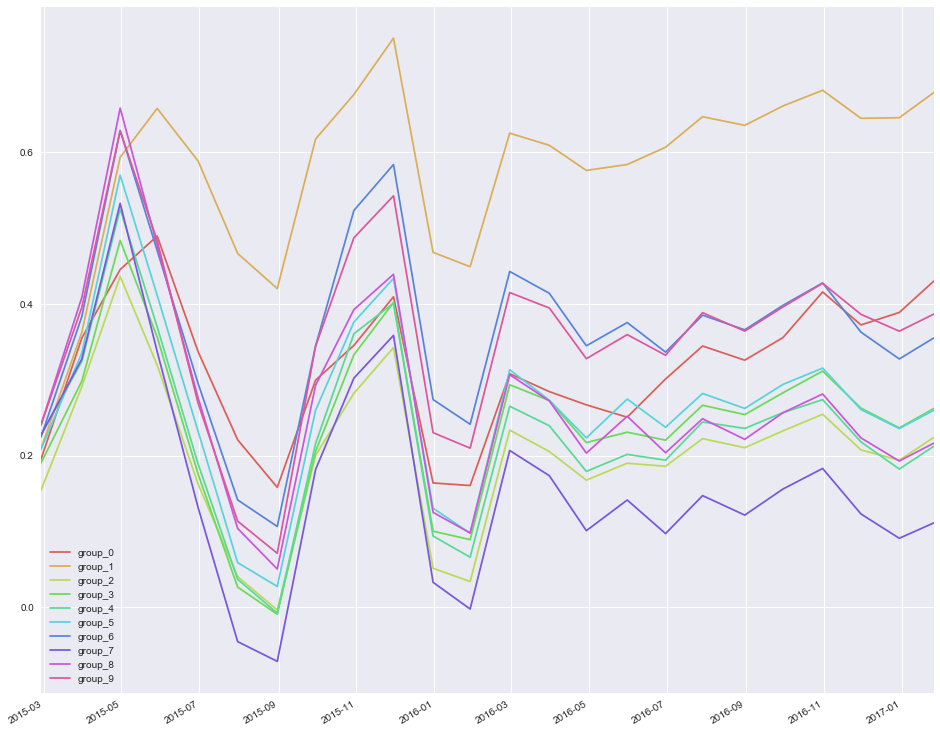

In [56]:
#plt.figure()
#my_colors = [(x/10.0, x/90.0, 0.35) for x in range(len(cumulativeRDF))] # <-- Quick gradient example along the Red/Green dimensions.
cumulativeRDF.plot(figsize=(16,14),color=sns.color_palette("hls",10))

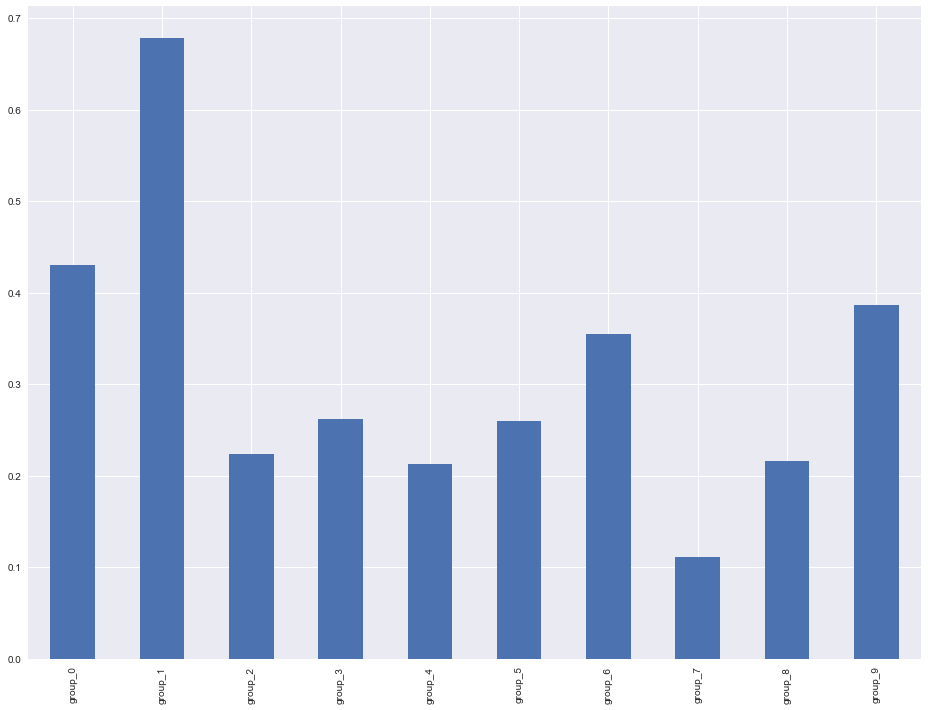

In [57]:
cumulativeRDF.iloc[-1].plot(figsize=(16,12),kind='bar')

In [58]:
#getStockGroup(ReturnDF,groupNum=3,Mean_Num=1,ascendingFlag=True)

In [59]:
ReturnDF.index

DatetimeIndex(['2015-02-27', '2015-03-31', '2015-04-30', '2015-05-29',
               '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
               '2015-10-30', '2015-11-30', '2015-12-31', '2016-01-29',
               '2016-02-29', '2016-03-31', '2016-04-29', '2016-05-31',
               '2016-06-30', '2016-07-29', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-30', '2017-01-26'],
              dtype='datetime64[ns]', freq=None)

In [60]:
ReturnForPlot =ReturnDF.copy()

In [61]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(x.month+1)) ### this shows the real time

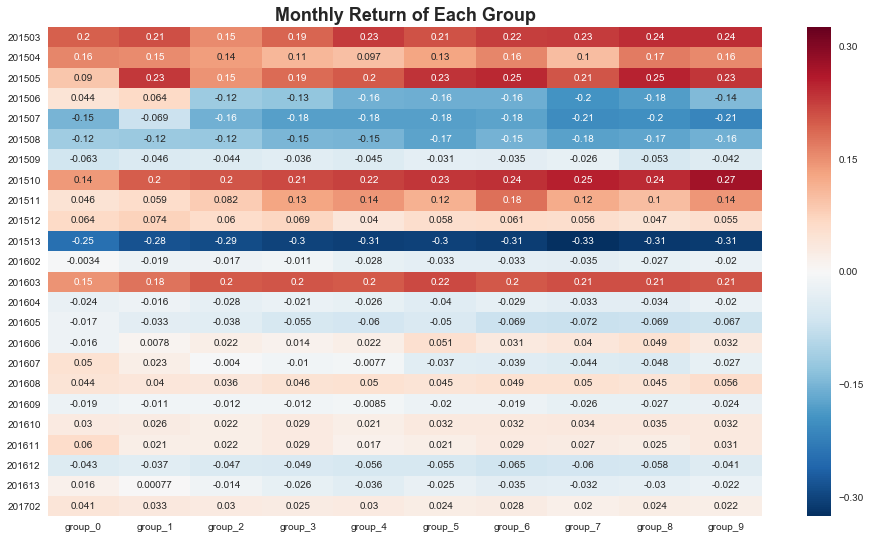

In [62]:
plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(ReturnForPlot,ax=ax, annot=True)
ax.set_title('Monthly Return of Each Group',fontsize=18, fontweight='bold')
plt.show()

In [63]:
### Calculate deviation of each group
ReturnDeviationDF = ReturnDF.apply(lambda x: x-x.mean(),axis=1)

In [64]:
ReturnDeviationDF 

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,-0.016599,-0.002270,-0.057353,-0.021461,0.015423,-0.003630,0.012869,0.015314,0.028922,0.028783
2015-03-31,0.023501,0.016709,0.000101,-0.028522,-0.039348,-0.009077,0.022409,-0.036112,0.031642,0.018696
2015-04-30,-0.111666,0.028765,-0.056468,-0.016430,-0.001110,0.032312,0.043234,0.003330,0.047441,0.030592
2015-05-29,0.157085,0.177370,-0.004242,-0.014512,-0.042418,-0.045359,-0.045346,-0.082677,-0.068066,-0.031833
2015-06-30,0.019017,0.102050,0.014970,-0.009090,-0.009180,-0.007861,-0.003698,-0.033959,-0.029433,-0.042815
2015-07-31,0.033051,0.027457,0.026937,0.000288,-0.002784,-0.023871,-0.004321,-0.027541,-0.022943,-0.006272
2015-08-31,-0.020551,-0.004170,-0.001666,0.006360,-0.002448,0.010748,0.007142,0.016156,-0.011369,-0.000202
2015-09-30,-0.080518,-0.024708,-0.018165,-0.007132,0.001606,0.010381,0.016096,0.030951,0.020382,0.051106
2015-10-30,-0.065821,-0.052930,-0.029729,0.015581,0.033098,0.004566,0.066975,0.008909,-0.011929,0.031279
2015-11-30,0.005659,0.015729,0.001803,0.010546,-0.018053,-0.000809,0.002133,-0.002123,-0.011819,-0.003066


In [65]:
testSeries=pd.Series(index=ReturnDeviationDF.columns.tolist(),data=np.repeat(1/len(ReturnDeviationDF.columns),len(ReturnDeviationDF.columns)))

In [66]:
a=np.argmin(np.abs(testSeries.cumsum()-2/3))
testSeries.cumsum().loc[a]-2/3

0.033333333333333326

In [67]:
testSeries.cumsum().index.get_loc(a)

6

In [68]:
######
testdict={}
s=list(np.linspace(0,1,4))
for i in s[:-1]: 
    print s[s.index(i)+1]
    testdict[i]=testSeries.cumsum()[(testSeries.cumsum().quantile(i)<testSeries.cumsum()) & (testSeries.cumsum()<=testSeries.cumsum().quantile(s[s.index(i)+1]))]
testdict

0.333333333333
0.666666666667
1.0


{0.0: group_1    0.2
 group_2    0.3
 dtype: float64, 0.33333333333333331: group_3    0.4
 group_4    0.5
 group_5    0.6
 dtype: float64, 0.66666666666666663: group_6    0.7
 group_7    0.8
 group_8    0.9
 group_9    1.0
 dtype: float64}

In [69]:
#### Another way to weigh the stocks  for group analysis
### 详细见华泰金工多因子研报的加权方法
splitOne={}
for i in np.linspace(0,1,4)[1:-1]:
    tempSeries = testSeries.cumsum()
    elementLabel = np.argmin(np.abs(tempSeries-i))
    if tempSeries.loc[elementLabel] - i >= 0:
        splitOne[elementLabel]=(tempSeries.loc[elementLabel] - i,1/len(ReturnDeviationDF.columns) - tempSeries.loc[elementLabel] + i)
        #previousElementPosition = int(tempSeries.index.get_loc(elementLabel)-1)
        #testSeries.loc[elementLabel] = tempSeries.loc[elementLabel] - i 
        #testSeries.iloc[previousElementPosition] = i - tempSeries.iloc[previousElementPosition]
    else :
        nextElementPosition = int(tempSeries.index.get_loc(elementLabel)+1)
        trueElementLabel = tempSeries.index[nextElementPosition ]
        splitOne[trueElementLabel] =  (i - tempSeries.loc[elementLabel]  ,0.1+tempSeries.loc[elementLabel] - i)

In [70]:
np.linspace(0,1,3,0)
testSeries.values.cumsum()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [71]:
np.percentile(testSeries.values.cumsum(),1/3)

0.10300000000000001

In [72]:
keyPosition=[]
for key in splitOne.keys():
    keyPosition.append(tempSeries.index.get_loc(key))
keyPosition=sorted(keyPosition)
keyPosition

[3, 6]

In [73]:
np.linspace(0,1,4)[1:-1]

array([ 0.33333333,  0.66666667])

In [74]:
correlationList=[]
for i in ReturnDF.index:
    q,p = scipy.stats.spearmanr(ReturnDF.loc[i].values,range(10,0,-1))
    correlationList.append(q)

In [75]:
np.nanmean(np.array(correlationList))

0.11717171717171715

In [110]:
cumulativeRDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,0.195096,0.209425,0.154342,0.190234,0.227118,0.208065,0.224564,0.227008,0.240617,0.240478
2015-03-31,0.355103,0.362640,0.290949,0.298217,0.324276,0.335493,0.383478,0.327402,0.408765,0.395680
2015-04-30,0.445350,0.593317,0.436393,0.483700,0.525079,0.569718,0.628625,0.532645,0.658118,0.628185
2015-05-29,0.489429,0.657681,0.319145,0.356182,0.369655,0.411353,0.470273,0.336962,0.477046,0.483346
2015-06-30,0.337143,0.588430,0.162812,0.175790,0.189172,0.232189,0.295273,0.131701,0.276312,0.269229
2015-07-31,0.220824,0.466517,0.040379,0.026707,0.037018,0.058948,0.141581,-0.045211,0.103998,0.113587
2015-08-31,0.158173,0.420246,-0.003388,-0.009033,-0.007531,0.027595,0.106623,-0.071156,0.050528,0.071284
2015-09-30,0.299482,0.617366,0.200275,0.205662,0.215903,0.259804,0.344546,0.181623,0.292738,0.344218
2015-10-30,0.345325,0.676100,0.282210,0.332907,0.360665,0.376033,0.523186,0.302196,0.392473,0.487161
2015-11-30,0.409402,0.750247,0.342430,0.401871,0.401030,0.433642,0.583736,0.358491,0.439072,0.542513


In [113]:
testdf=pd.DataFrame(index=cumulativeRDF.index,columns=cumulativeRDF.columns,data=np.random.rand(cumulativeRDF.shape[0],cumulativeRDF.shape[1]))

In [114]:
cumulativeRDF.rolling(window=4).corr(testdf)

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,0.033161,0.777739,0.868524,-0.872904,0.943554,0.543382,0.766900,0.138861,0.409727,0.032984
2015-06-30,-0.158462,0.476604,0.938597,-0.142610,0.017354,0.079048,0.103243,-0.025690,0.959588,0.470373
2015-07-31,-0.076684,0.512514,0.759728,-0.019999,-0.738113,0.393540,-0.031773,0.460326,-0.323454,0.036747
2015-08-31,-0.242840,0.483063,-0.340024,0.846940,-0.967538,0.795057,-0.680483,0.210617,-0.623250,-0.804880
2015-09-30,0.260900,0.283003,-0.497666,0.419356,-0.987777,0.081777,0.546912,0.980852,-0.098460,-0.963896
2015-10-30,0.223616,0.988439,-0.765789,0.883848,-0.993412,0.424156,-0.453234,0.377094,-0.365764,-0.967527
2015-11-30,0.466535,0.042897,-0.905898,0.877952,-0.988347,0.571578,-0.472391,0.034728,-0.058833,-0.460147


In [184]:
# Calculate IC of the factor at selected date and generate a DataFrame
def calcIC(factorDF,selectedDates,priceDF,factorName,timeWindow= 20):
    #factorDF: pd.DataFrame . The dataframe of the factor that u want to calc IC.
    # factorData is not necessarily neutralized but it should be at least  winsorsized and normalized.
    #selectedDates : List .Commonly it's the list of end of month.
    #priceDF: pd.DataFrame . The dataframe of the price of each stocks
    corDF = factorDF.rolling(window=timeWindow,min_periods=10).corr(priceDF).loc[selectedDates].dropna(how='all') # Care that the data length may not equal! 
    newDF = pd.DataFrame(index=list(set(selectedDates) & set(corDF.index)),columns=factorName,data=None).iloc[:-1] # Pay attention !Bugs may be detected here#!
    monthlyPnl = priceDF.loc[selectedDates].pct_change().shift(-1).iloc[:-1]
    newDF = newDF.apply(lambda x: corDF.loc[x.index].corr(monthlyPnl.loc[x.index],method='Spearman'),axis=0)
    return newDF.round(4)

In [77]:
#### -----------------------------------  End --------------------------------------- ###

In [185]:
### 
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]
for i,j in Group.iteritems():
    groupDF = monthEndData[j]
    ReturnDF[i] = groupDF.mean(axis=1)
ReturnDF.sort_index(axis=1,inplace=True)

NameError: name 'Group' is not defined

In [ ]:
###
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]
for i,j in totalGroup.iteritems():
    ReturnDF.loc[i] = monthEndData.loc[i][j]
    for i,j in Group.iteritems():
        groupDF = monthEndData[j]
        ReturnDF[i] = groupDF.mean(axis=1)
    ReturnDF.sort_index(axis=1,inplace=True)

In [ ]:
totalGroupDict.keys()

In [ ]:
ReturnDF

In [ ]:
Group1Return=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]

In [ ]:
Group1Return['Return of the Group0']=Group1Return[group0List].mean(axis=1)

In [ ]:
Group1Return['Return of the Group0']

In [ ]:
group0List=list(set(returnData.columns.tolist())&set(Group['group_0']))
group1List=list(set(returnData.columns.tolist())&set(Group['group_5']))

In [ ]:
group0DF=returnData[group0List]
group1DF=returnData[group1List]

In [ ]:
group0DF

In [ ]:
s1=group0DF['sum']=group0DF.sum(axis=1)
s2=group1DF['sum']=group1DF.sum(axis=1)

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(s1.index,s1.values)
plt.plot(s2.index,s2.values)
plt.show()

In [ ]:
c=(group0DF['sum']-group1DF['sum']).cumsum()

In [ ]:
len(c[c<0])/len(c)

In [ ]:
group0DF['sum'].cumsum()-group1DF['sum'].cumsum()

In [ ]:
FinalDF.dropna(axis=1)

In [ ]:
### Group the stocks sorted by factor's value,out tput is dictionary whose value is the list of stocks' code.
### This algorithm is able to make use of all data (no data left)
groupDic={}
groupNum=10
processedData=disposeData(PEData,timeStampNum,True)
sortedStk=processedData.iloc[-30:].mean().sort_values(ascending=True)
stkNumPerGFloor = int(np.floor(len(sortedStk)/groupNum))
stkNumPerGCeil = int(np.ceil(len(sortedStk)/groupNum))
remainderCount=int(np.mod(len(sortedStk),groupNum))
sortedStk.shape
for i in xrange(groupNum):
    if i< remainderCount:
        groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:(i+1)*stkNumPerGCeil].index.tolist()
    elif i == remainderCount:
        groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:i*stkNumPerGCeil+stkNumPerGFloor].index.tolist()
    else:
        groupDic['group'+'_'+str(i)] = sortedStk[remainderCount+i*stkNumPerGFloor:remainderCount+(i+1)*stkNumPerGFloor].index.tolist()

In [ ]:
processedData

In [ ]:
stkNumPerGCeil

In [ ]:
remainderCount

In [ ]:
len(sortedStk[remainderCount+8*stkNumPerGFloor:remainderCount+9*stkNumPerGFloor])

In [ ]:
len(sortedStk[-482:-241])

In [ ]:
a=0
for j,i in groupDic.iteritems():
    a+=len(i)
    print j,len(i)
a

In [ ]:
#len(enoughDataStockList)

In [ ]:
PEData=PEData[enoughDataStockList]
PEData.shape

In [ ]:
### fill N/A value with the last valid observation  
PEData=PEData.fillna(method='ffill')
PEData=PEData.fillna(method='bfill')
PEData

In [ ]:
#PEData.isnull().sum()

In [ ]:
#PEData=PEData.tail(250).dropna(axis=1)

In [ ]:
PEData=PEData[(PEData>(PEData.mean()-3*PEData.std()))&(PEData<(PEData.mean()+3*PEData.std()))]
PEData=(PEData-PEData.mean())/PEData.std()

In [ ]:
PEData

In [ ]:
PEData.dropna(axis=1,inplace=True)

In [ ]:
PEData

In [ ]:
#data.clip(data.mean()-3*data.std(),data.mean()+3*data.std(),axis=1)

In [ ]:
FCAPData=pd.read_csv(path+filenamex,infer_datetime_format=True,parse_dates=[0],index_col=0)
FCAPData=FCAPData.tail(300)[:250].dropna(axis=1)
#FCAPData.dropna(axis=1,inplace=True)
FCAPData

In [ ]:
FCAPData=FCAPData[(FCAPData>(FCAPData.mean()-3*FCAPData.std()))&(FCAPData<(FCAPData.mean()+3*FCAPData.std()))]
FCAPData=(FCAPData-FCAPData.mean())/FCAPData.std()

In [ ]:
FCAPData.dropna(axis=1,inplace=True)

In [ ]:
FCAPData

In [ ]:
stocklist=list(set(PEData.columns.tolist()) & set (FCAPData.columns.tolist()))

In [ ]:
len(stocklist)

In [ ]:
#FCAPData['000005.SZ']

In [ ]:
a = np.array([[.001,.05,-.003,.014,.035,-.01,.032,-.0013,.0224,.005],[-.011,.012,.0013,.014,-.0015,.019,-.032,.013,-.04,-.05608],
 [.0021,.02,-.023,.0024,.025,-.081,.032,-.0513,.00014,-.00015],[.001,.02,-.003,.014,.035,-.001,.032,-.003,.0224,-.005],
 [.0021,-.002,-.023,.0024,.025,.01,.032,-.0513,.00014,-.00015],[-.0311,.012,.0013,.014,-.0015,.019,-.032,.013,-.014,-.008],
 [.001,.02,-.0203,.014,.035,-.001,.00032,-.0013,.0224,.05],[.0021,-.022,-.0213,.0024,.025,.081,.032,.05313,.00014,-.00015],
 [-.01331,.012,.0013,.014,.01015,.019,-.032,.013,-.014,-.012208],[.01021,-.022,-.023,.0024,.025,.081,.032,.0513,.00014,-.020015]])

y = a[:, 0]
x = a[:, 1:]
results = sm.OLS(y, x).fit()
print x

In [ ]:
#FCAPData['600601.SH']

In [ ]:
PEData.index[0]

y=PEData['300081.SZ']
x=FCAPData['300081.SZ']
a=np.random.random(10)
b=np.random.random(10)
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
#result.resid

In [ ]:
FactorDisposedDF = pd.DataFrame(index=FCAPData.index,columns=stocklist,data=None) 

In [ ]:
PEData=PEData[stocklist]
FCAPData=FCAPData[stocklist]

In [ ]:
for time in PEData.index:
    y=PEData[PEData.index==time]
    #print (y)
    x=FCAPData[FCAPData.index==time]
    result=sm.OLS(y,x).fit()
    print result.resid.values
    FactorDisposedDF.loc[time]=result.resid.values

In [ ]:
FactorDisposedDF.shape

In [ ]:
#for stock in stocklist:
    #result=sm.OLS(PEData[stock],sm.add_constant(FCAPData[stock])).fit()
    #FactorDisposedDF[stock] = result.resid

In [ ]:
FactorDisposedDF

In [ ]:
InData=pd.read_csv(path+filenamez,infer_datetime_format=True,parse_dates=[0],index_col=0)
InData=InData.tail(300)[:250].dropna(axis=1,how='any')
InData.min().min()

In [ ]:
InData

In [ ]:
InData.index

In [ ]:
#InData['000916.SZ'].iloc[-1].index

In [ ]:
InduNum=int(InData.max().max()-InData.min().min())
x=range(InduNum)
DummyDF=pd.DataFrame(index=x,columns=InData.columns.tolist(),data=None)

In [ ]:
DummyDF

In [ ]:
for stk in DummyDF.columns.tolist():
    Tag = int(InData[stk].iloc[-1])
    if Tag == InduNum+1:
        pass
    else:
        DummyArray = np.zeros(InduNum)
        DummyArray[Tag-1] = 1
        DummyDF[stk] = DummyArray
DummyDF

In [ ]:
DummyDF.dropna(axis=1,inplace=True)
DummyDF

In [ ]:
StockPoolOLS=list(set(stocklist) & set(DummyDF.columns.tolist()))
len(StockPoolOLS)

In [ ]:
PEData=PEData[StockPoolOLS]
FCAPData=FCAPData[StockPoolOLS]

In [ ]:
DummyDF=DummyDF[StockPoolOLS]
DummyDF

In [ ]:
l=DummyDF.append(FCAPData[FCAPData.index=='2015-11-20']).T
l

In [ ]:
y=PEData[PEData.index=='2015-11-20'].T
#y=np.asarray(y.T)
y

In [ ]:
#print (y)
#x=np.asarray(l)
result=sm.OLS(y,l).fit()
print result.resid.values
FactorDisposedDF.loc[time]=result.resid

In [ ]:
FactorDisposedDF

In [ ]:
a=np.array([1,2,3,4,5])
zip(a)

In [ ]:
h=np.array([[i] for i in a])
h

In [ ]:
d=np.array([DummyDF['000005.SZ'].values,]*5)
np.insert(d,[0],h,axis=1)

In [ ]:
StockPoolOLS

In [ ]:
FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
FinalDF

In [ ]:
for time in PEData.index:
    y=PEData[PEData.index==time]
    #print (y)
    x=FCAPData[FCAPData.index==time]
    result=sm.OLS(y,x).fit()
    print result.resid.values
    FactorDisposedDF.loc[time]=result.resid.values

In [ ]:
FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
Period = len(InData)
for time in FinalDF.index: 
    CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
    #print CrossSecData.T.iloc[-1]
    Y=PEData[PEData.index==time].T
    #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
    #InsertArray = FCAPData[stk].values
    #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
    #print (InsertArray)
    #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
    #print (InDependence)
    #try:
    result=sm.OLS(Y,CrossSecData).fit()
    #except:
    #pass
    FinalDF.loc[time] = result.resid

In [ ]:
FinalDF

In [ ]:
FinalDF.shape

In [ ]:
FinalDF.dropna(axis=1,how='all').shape

In [ ]:
DummyMatrix = np.array([DummyDF[ '300081.SZ'].values,]*Period)
InsertArray = FCAPData[ '300081.SZ'].values
InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
print InDependence
result=sm.OLS(PEData[ '300081.SZ'].values,sm.add_constant(InDependence)).fit()

In [ ]:
result.summary()

In [ ]:
result.resid

In [ ]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = (groups[:, None] == np.unique(groups)).astype(float)
x = np.linspace(0, 20, nsample)
X = np.c_[x, dummy[:, 1:], np.ones(nsample)]
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [ ]:
X